In [1]:
import pandas as pd
from skimpy import skim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [2]:
# options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", lambda x: f"{x :.2f}")
color = sns.color_palette()
#plt.style.use('dark_background')

In [3]:
df = pd.read_csv(r"C:\Users\Work\Desktop\projects\algo\data\all_crypto.csv")
print(df.head())

   Unnamed: 0  SNo  Name Symbol                 Date  High   Low  Open  Close  \
0           0    1  Aave   AAVE  2020-10-05 23:59:59 55.11 49.79 52.68  53.22   
1           1    2  Aave   AAVE  2020-10-06 23:59:59 53.40 40.73 53.29  42.40   
2           2    3  Aave   AAVE  2020-10-07 23:59:59 42.41 35.97 42.40  40.08   
3           3    4  Aave   AAVE  2020-10-08 23:59:59 44.90 36.70 39.89  43.76   
4           4    5  Aave   AAVE  2020-10-09 23:59:59 47.57 43.29 43.76  46.82   

      Volume    Marketcap  
0       0.00  89128128.86  
1  583091.46  71011441.25  
2  682834.19  67130036.90  
3 1658816.92 220265142.11  
4  815537.66 235632208.16  


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37082 non-null  int64  
 1   SNo         37082 non-null  int64  
 2   Name        37082 non-null  object 
 3   Symbol      37082 non-null  object 
 4   Date        37082 non-null  object 
 5   High        37082 non-null  float64
 6   Low         37082 non-null  float64
 7   Open        37082 non-null  float64
 8   Close       37082 non-null  float64
 9   Volume      37082 non-null  float64
 10  Marketcap   37082 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.1+ MB


In [5]:
df = df.drop(columns=['Unnamed: 0', 'SNo'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       37082 non-null  object 
 1   Symbol     37082 non-null  object 
 2   Date       37082 non-null  object 
 3   High       37082 non-null  float64
 4   Low        37082 non-null  float64
 5   Open       37082 non-null  float64
 6   Close      37082 non-null  float64
 7   Volume     37082 non-null  float64
 8   Marketcap  37082 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.5+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 37082  │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ High     │  0 │    0 │     1016 │     5250 │ 8.899e-0 │  0.07566 │    1.009 │    31.92 │    64860 │   ▇    │  │
│ │          │    │      │          │          │        5 │          │          │          │          │        │  │
│ │ Low      │  0 │    0 │      953 │     4908 │ 7.93e-05 │  0.06954 │   0.9998 │       29 │    62210 │   ▇    │  │
│ │ Open     │  0 │    0 │    985.3 │     5088 │ 8.571e-0 │  0.07246 │    1.001 │    30.46 │    63520 │   ▇    │  │
│ │          │    │      │          │          │        5 │          │          │          │          │        │  │
│ │ Close    │  0 │    0 │    987.1 │     5094 │ 8.572e-0 │  0.07265 │    1.001 │    30.51 │    63500 │   ▇    │  │
│ │          │    │      │          │          │        5 │          │          │          │          │        │  │
│ │ Volume   │  0 │    0 │ 30230000 │ 11910000 │        0 │  4937000 │ 85130000 │ 93880000 │ 35100000 │   ▇    │  │
│ │          │    │      │       00 │      000 │          │          │          │        0 │     0000 │        │  │
│ │ Marketca │  0 │    0 │ 15430000 │ 70590000 │        0 │ 23960000 │ 14050000 │ 51590000 │ 11860000 │   ▇    │  │
│ │ p        │    │      │      000 │      000 │          │        0 │       00 │       00 │    00000 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ Date             │    0 │       0 │    2013-04-29 23:59:59     │    2021-07-06 23:59:59     │ None         │  │
│ └──────────────────┴──────┴─────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ w

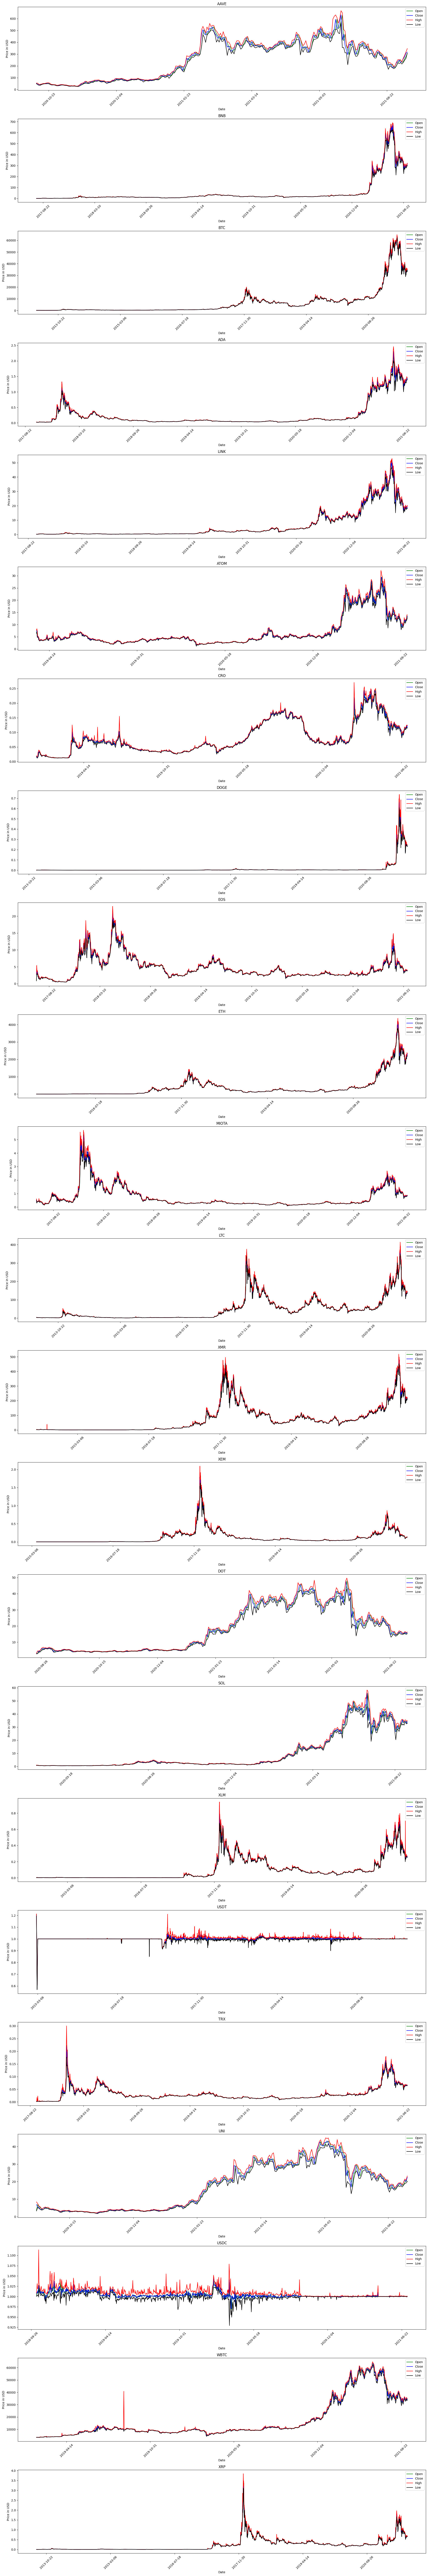

In [8]:
symbols = df['Symbol'].unique()
df['date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
fig, ax = plt.subplots(len(symbols), 1, figsize=(20, 120))

for symbol, ax in zip(symbols, ax.flatten()):
    symbol_data = df[df['Symbol'] == symbol]
    
    sns.lineplot(data=symbol_data, x='date_mpl', y='Open', ax=ax, label='Open', color='green')
    sns.lineplot(data=symbol_data, x='date_mpl', y='Close', ax=ax, label='Close', color='blue')
    sns.lineplot(data=symbol_data, x='date_mpl', y='High', ax=ax, label='High', color='red')
    sns.lineplot(data=symbol_data, x='date_mpl', y='Low', ax=ax, label='Low', color='black')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price in USD')
    ax.set_title(symbol)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.legend() 

plt.tight_layout()
plt.show()


In [9]:
#  Transaction volumes
# You will examine the evolution of these volumes over a given period in order to 
# identify key trends and periods of high activity.

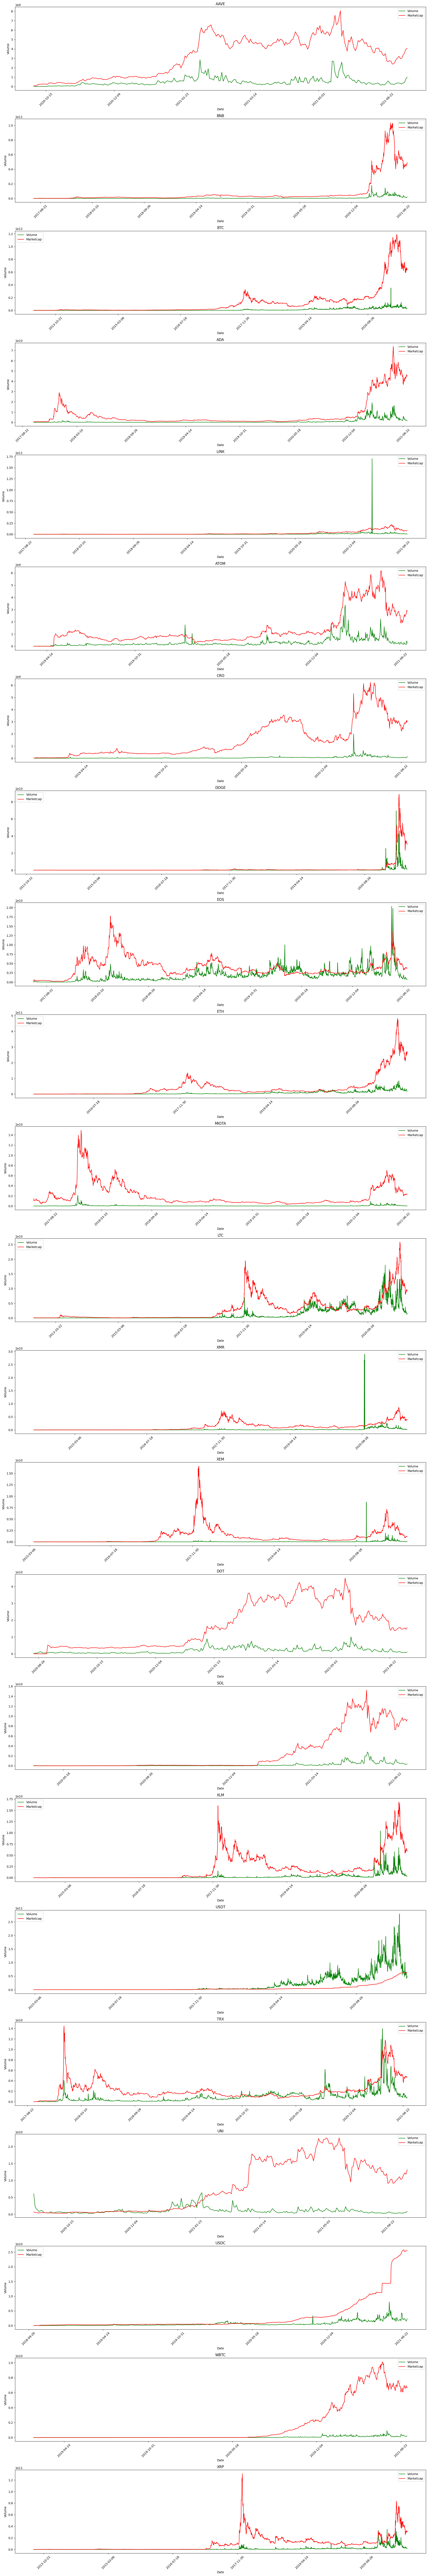

In [10]:
fig, ax = plt.subplots(len(symbols), 1, figsize=(20, 120))

for symbol, ax in zip(symbols, ax.flatten()):
    symbol_data = df[df['Symbol'] == symbol]
    sns.lineplot(data=symbol_data, x='date_mpl', y='Volume', ax=ax, label='Volume', color='green')
    sns.lineplot(data=symbol_data, x='date_mpl', y='Marketcap', ax=ax, label='Marketcap', color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.set_title(symbol)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_tick_params(rotation=45)
    ax.legend() 

plt.tight_layout()
plt.show()

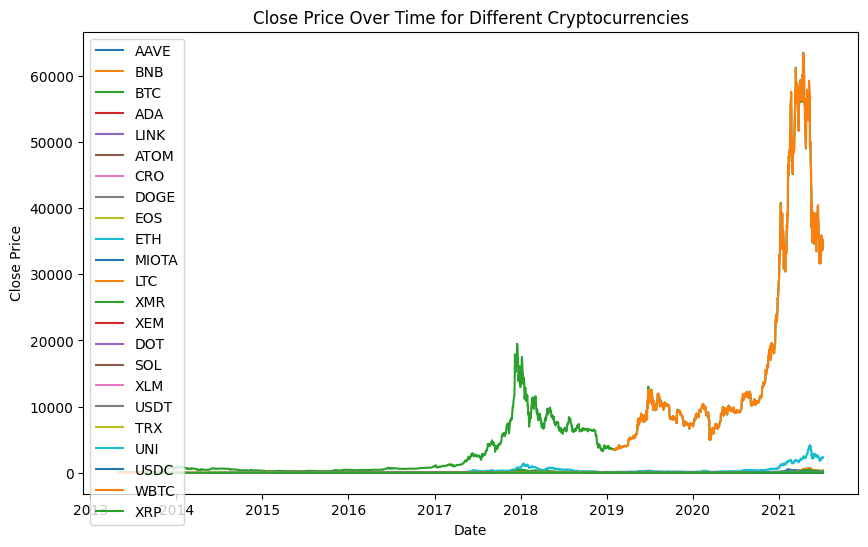

In [11]:
# trends
fig, ax = plt.subplots(figsize=(10, 6))


for symbol in symbols:
    symbol_data = df[df['Symbol'] == symbol]
    sns.lineplot(x=symbol_data['Date'], y=symbol_data['Close'], data=symbol_data, ax=ax, label=symbol)
ax.legend()
ax.set_title('Close Price Over Time for Different Cryptocurrencies')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

plt.show()